In [1]:
%reload_ext autoreload
%autoreload 2

from src.iaf.simulation import run_simulation
import numpy as np
from scipy.signal import lfilter, filtfilt
import matplotlib.pyplot as plt

In [2]:
results_high_dp = run_simulation(
    duration=800,
    basal_depression_ratio=1.1,
    apical_depression_ratio=1.1,
    basal_use_replacement=True,
    apical_use_replacement=True,
    basal_num_synapses=300,
    apical_num_synapses=100,
    inhibitory_num_synapses=200,
    num_inputs=300,
    num_signals=3,
    source_strength=1.0,
    gauss_source_width = 2 / 5,
)

100%|██████████| 800/800 [01:51<00:00,  7.18it/s]

Simulation completed in 111.43 seconds
Number of spikes: 26739
Average firing rate: 33.42 Hz


In [9]:
results_low_dp = run_simulation(
    duration=800,
    basal_depression_ratio=1.1,
    apical_depression_ratio=1.00,
    basal_use_replacement=True,
    apical_use_replacement=True,
    basal_num_synapses=300,
    apical_num_synapses=100,
    inhibitory_num_synapses=200,
    num_inputs=300,
    num_signals=3,
    source_strength=1.0,
    gauss_source_width = 2 / 5,
)

100%|██████████| 800/800 [01:40<00:00,  7.95it/s]

Simulation completed in 100.67 seconds
Number of spikes: 27198
Average firing rate: 34.00 Hz


[autoreload of src.iaf.synapse_group failed: Traceback (most recent call last):
  File "/usr/local/Caskroom/miniforge/base/envs/rl-playground/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/Caskroom/miniforge/base/envs/rl-playground/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/Caskroom/miniforge/base/envs/rl-playground/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/usr/local/Caskroom/miniforge/base/envs/rl-playground/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 365, in update_class
    update_instances(old, new)
  File "/usr/local/Caskroom/miniforge/base/envs/rl-playground/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 323, in update_instances
    object.__setattr__(ref, "__c

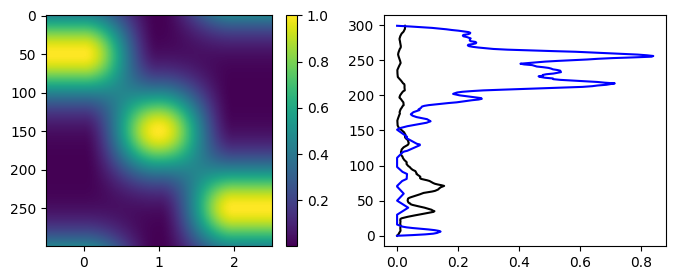

In [18]:
plt.figure(1, figsize=(8, 3))

synapse_index = 1
synapse_group = "apical_weights"

plt.subplot(1, 2, 1)
im = plt.imshow(results_low_dp["sim"].source_population.source_loading.T, aspect='auto')
plt.colorbar(im)

plt.subplot(1, 2, 2)
smooth_factor = round(results_high_dp["sim"].source_population.num_inputs/results_high_dp["sim"].source_population.num_signals/10)
max_weight = results_high_dp["sim"].neuron.synapse_groups[synapse_index].max_weight
kernel = np.ones(smooth_factor) / smooth_factor
saw = filtfilt(kernel, 1, results_high_dp[synapse_group][:, -1])
plt.plot(saw/max_weight, range(results_high_dp["sim"].source_population.num_inputs-1, -1, -1), 'k', linewidth=1.5, label="High DP")

smooth_factor = round(results_low_dp["sim"].source_population.num_inputs/results_low_dp["sim"].source_population.num_signals/10)
max_weight = results_low_dp["sim"].neuron.synapse_groups[synapse_index].max_weight
kernel = np.ones(smooth_factor) / smooth_factor
saw = filtfilt(kernel, 1, results_low_dp[synapse_group][:, -1])
plt.plot(saw/max_weight, range(results_low_dp["sim"].source_population.num_inputs-1, -1, -1), 'b', linewidth=1.5, label="Low DP")

plt.show()

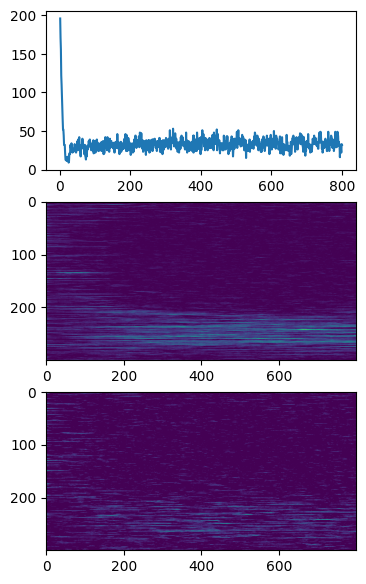

In [19]:
# Create spike train and PSTH
results = results_high_dp

NT = int(np.round(results["sim"].duration / results["sim"].dt))
dt = results["sim"].dt
spikes = np.zeros(NT)
spikes[results["spike_times"]] = 1
psth_window = 1  # in seconds
dpsth = round(psth_window/dt)
psth = np.sum(spikes.reshape(-1, dpsth), axis=1)/psth_window
tvec = np.arange(NT) * dt + dt

# Create plots
plt.figure(1, figsize=(4, 7))
plt.subplot(3, 1, 1)
plt.plot(range(1, len(psth) + 1), psth)
plt.subplot(3, 1, 2)
plt.imshow(results["basal_weights"], aspect='auto')
plt.subplot(3, 1, 3)
plt.imshow(results["apical_weights"], aspect='auto')
plt.show()

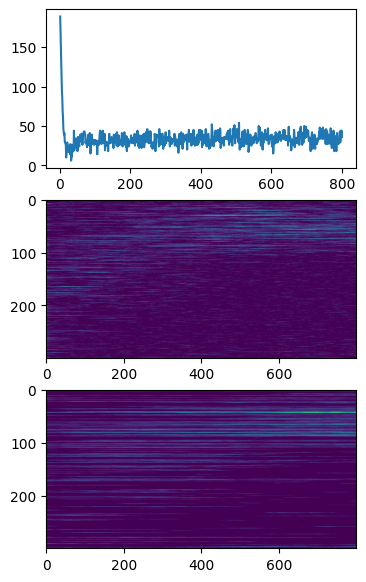

In [20]:
# Create spike train and PSTH
results = results_low_dp

NT = int(np.round(results["sim"].duration / results["sim"].dt))
dt = results["sim"].dt
spikes = np.zeros(NT)
spikes[results["spike_times"]] = 1
psth_window = 1  # in seconds
dpsth = round(psth_window/dt)
psth = np.sum(spikes.reshape(-1, dpsth), axis=1)/psth_window
tvec = np.arange(NT) * dt + dt

# Create plots
plt.figure(1, figsize=(4, 7))
plt.subplot(3, 1, 1)
plt.plot(range(1, len(psth) + 1), psth)
plt.subplot(3, 1, 2)
plt.imshow(results["basal_weights"], aspect='auto')
plt.subplot(3, 1, 3)
plt.imshow(results["apical_weights"], aspect='auto')
plt.show()